# Week 21 Group Activity

In [1]:
# Dependencies and modules:

import pandas as pd
import numpy as np
import statistics
import math
import requests
import html
import time
import json
import os
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import re

## 1. Make sure you can get the API from class to work in Azure. Take a screenshot of it working and add the image to a jupyter notebook.

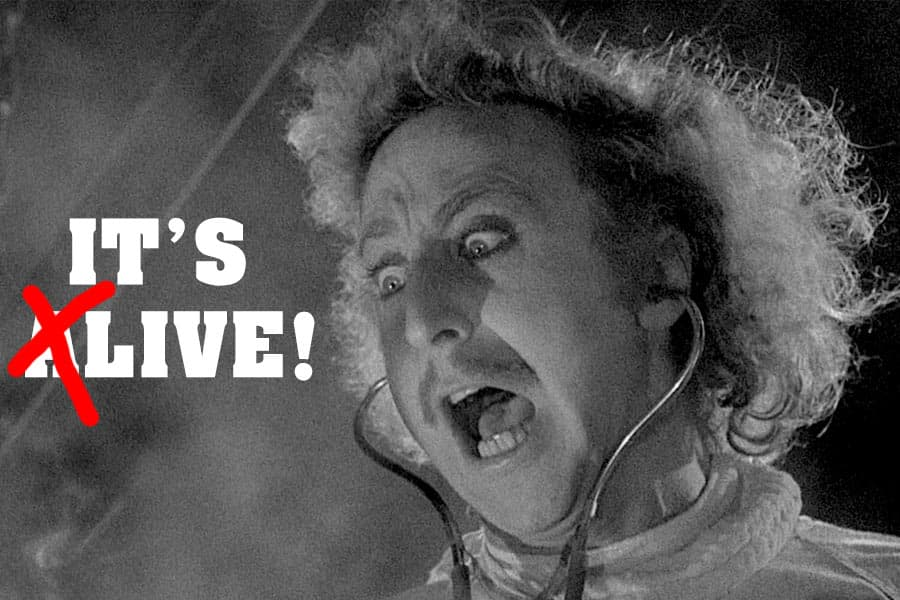

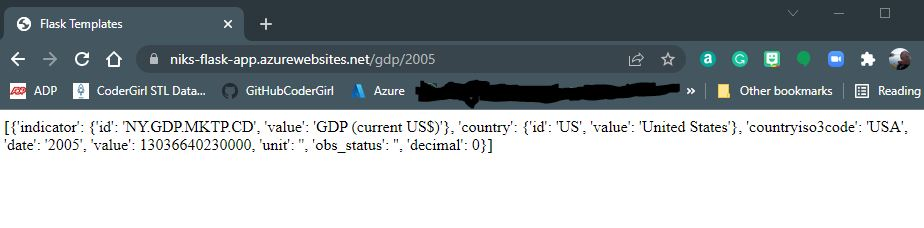

(But then I made a lot of changes, broke it, fixed it, then took another screenshot. XD)

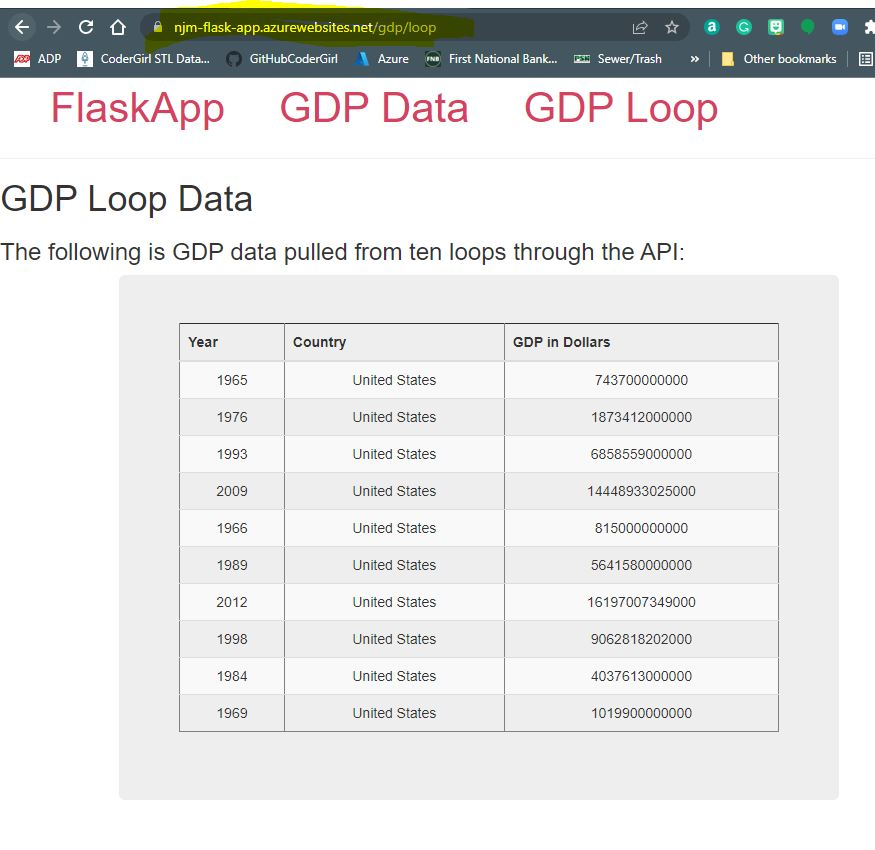

## 2. Loop through the API data in python using the ``/gdp/<year>`` endpoint for your API. What does it look like? Is there a way to alter the html page to simplify what you see?

There are a lot of ways to make this output data more readable. I got pretty deep into the weeds on this assignment because I found it particularly engaging. There are a lot of tutorials out there for this kind of thing, and I found myself trying out using inheritance and base templates. I worked through some of the concepts I liked here. I edited the flask-app significantly because I am more comfortable with python than html at this point, but this assignment really opened my eyes to what can be accomplished with even simple html templates and hybrid/crossover languages like Jinja.

In [2]:
# I loaded the json file into my notebook so I could examine it's structure.

a_file = open("us_gdp.json", "r")
a_json = json.load(a_file)

a_json[1]

[{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2020',
  'value': 20936600000000,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2019',
  'value': 21433224697000,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2018',
  'value': 20611860934000,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2017',
  'value': 19542979183000,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indic

In [21]:
# I came up with some python code to loop thru the api the way I wanted:

def gdp_loop():
    
    data = a_json[1]
    data_dict = data[0]
    years = np.random.randint(low=1961, high=2021, size=10)
    GDP_Data = {'Year':[],'Country':[],
             'GDP in Dollars': []}

    for year in years:
        output_data = [x for x in data if x['date']==str(year)]
        output_dict = output_data[0]
        GDP_Data['Year'].append(output_dict['date'])
        GDP_Data['Country'].append(output_dict['country']['value'])
        GDP_Data['GDP in Dollars'].append(output_dict['value'])
                
        GDP_df = pd.DataFrame(GDP_Data)
        HTML_table = HTML(GDP_df.to_html(justify="center", classes='table table-striped', index=False))

        
    return HTML_table

gdp_loop()

Year,Country,GDP in Dollars
1990,United States,5963144000000
2005,United States,13036640230000
1994,United States,7287236000000
1962,United States,605100000000
1965,United States,743700000000
1964,United States,685800000000
2009,United States,14448933025000
1965,United States,743700000000
2004,United States,12213729147000
2010,United States,14992052727000


This renders pretty nice on the web page. The question asked us to alter the html page in order to accomplish this, but with .to_html, render_template function, and the ease of using python in my flask-app document, it wasn't really necessarty to change the html template. I did use some inheritance and played with having multiple html templates for different endpoints. I feel like that is a pretty powerful tool to have in my toolbox.

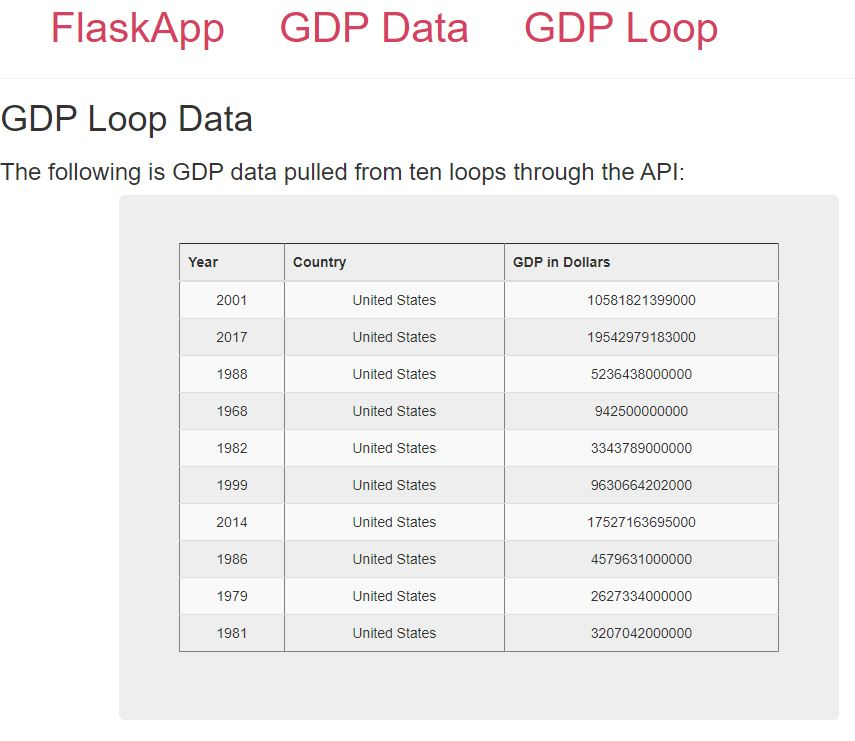